In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
country_df=pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# converting %age to absolute value
country_df['imports']=(country_df.imports*country_df.gdpp)/100
country_df['exports']=(country_df.exports*country_df.gdpp)/100
country_df['health']=(country_df.health*country_df.gdpp)/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [5]:
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Data is clean.

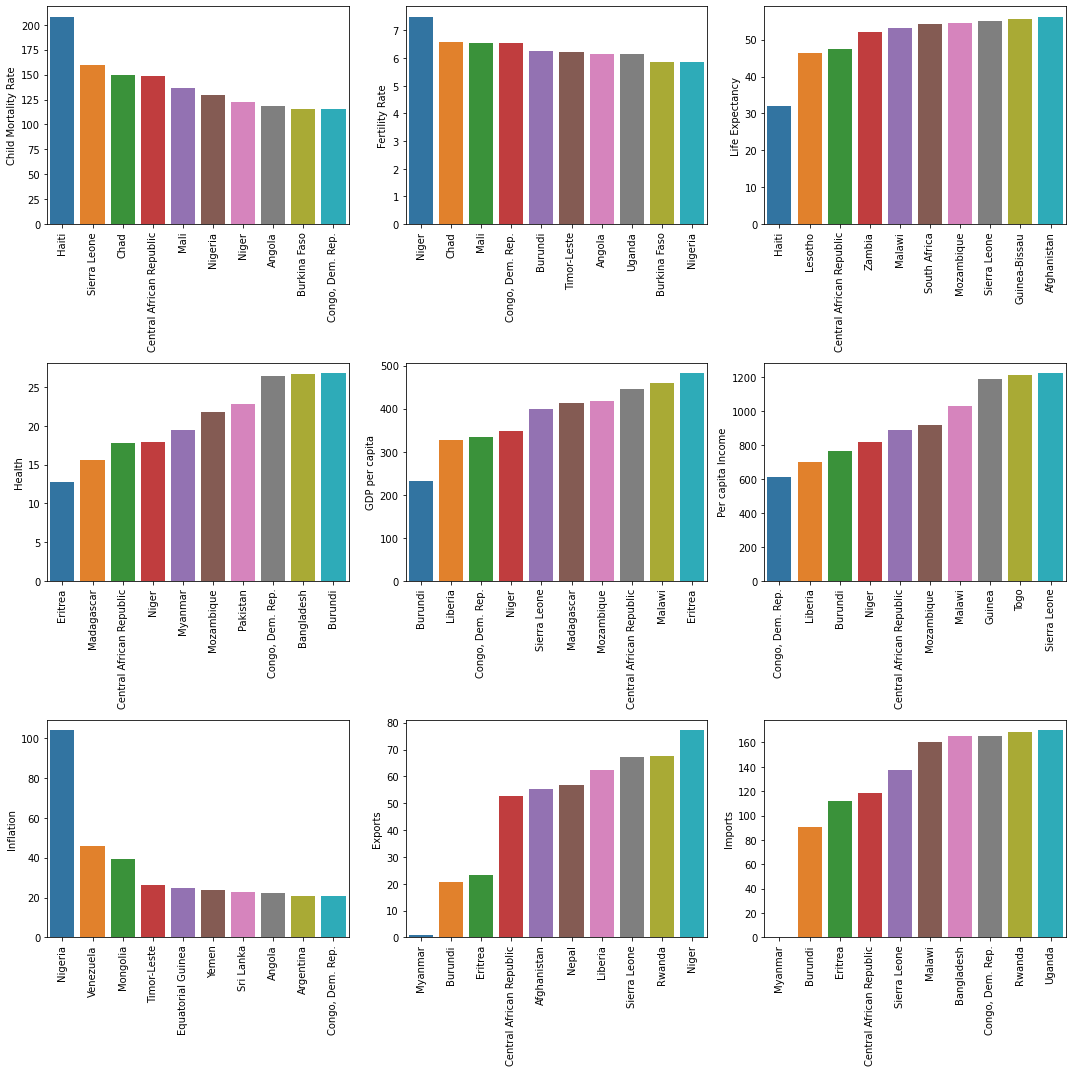

In [6]:
# univariate analysis
fig, axs = plt.subplots(3,3,figsize = (15,15))
top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')
bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')
bottom10_health = country_df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')
bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')
bottom10_income = country_df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')
top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')
bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')
bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
#plt.savefig('eda')
plt.show()

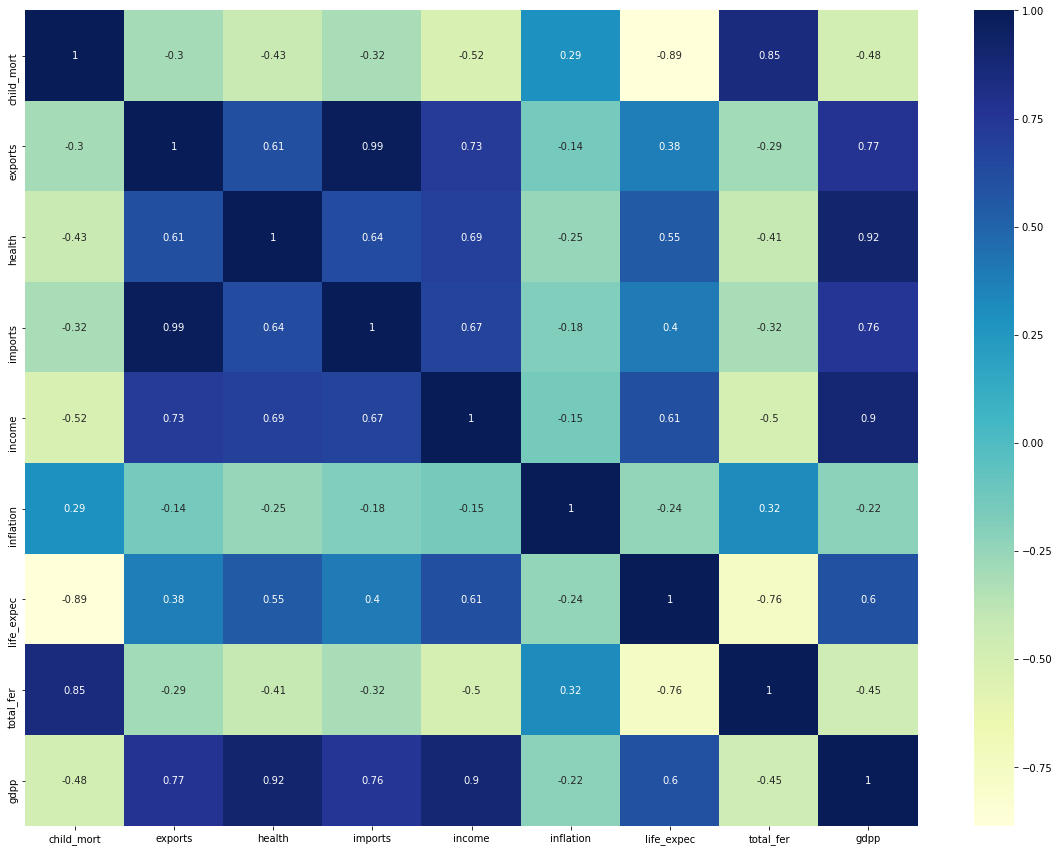

In [7]:
# Bivariate analysis
plt.figure(figsize = (20, 15))
sns.heatmap(country_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

In [8]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


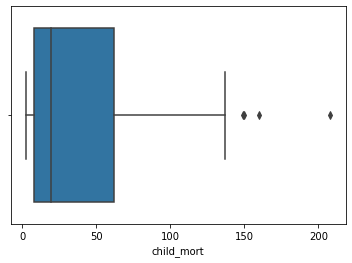

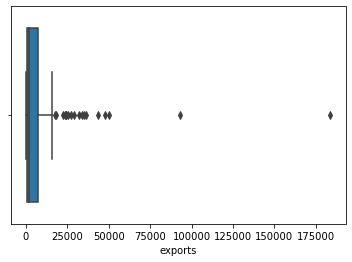

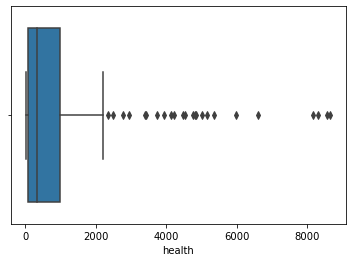

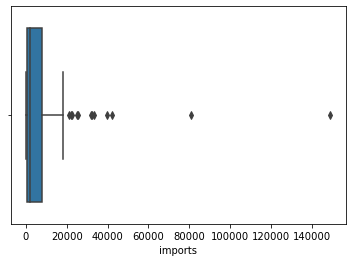

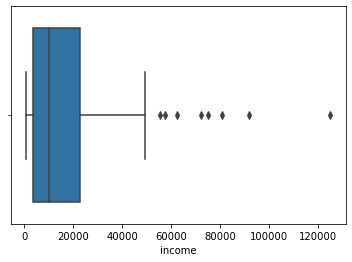

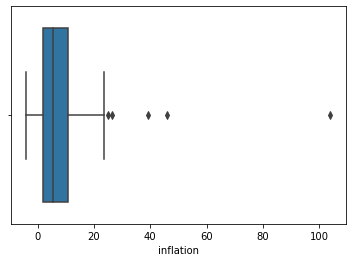

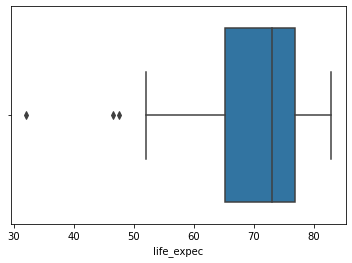

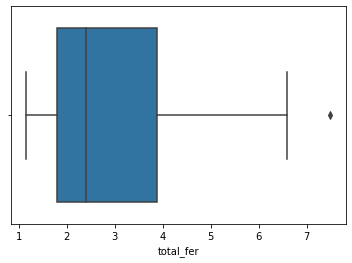

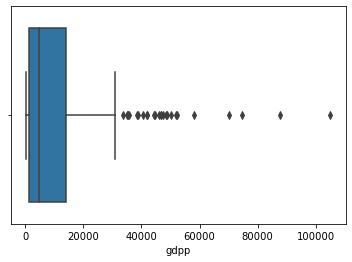

In [9]:
def plot(column,data):
    sns.boxplot(data[column])
    plt.show();
    
for column in country_df.describe().columns:
    plot(column,country_df)

In [10]:
country=country_df.copy()
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
# handling outlier
cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
def outlierHandler(data,column):
    quantiles = data[column].quantile([0.05,0.95]).values
    data[column][data[column] <= quantiles[0]] = quantiles[0]
    data[column][data[column] >= quantiles[1]] = quantiles[1]
    
for column in cols:
    outlierHandler(country,column)

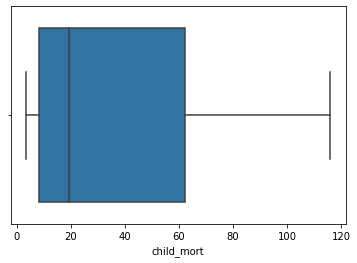

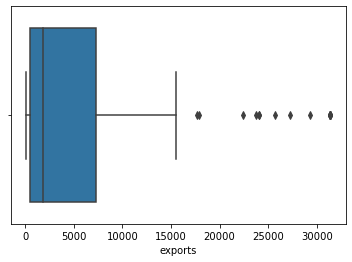

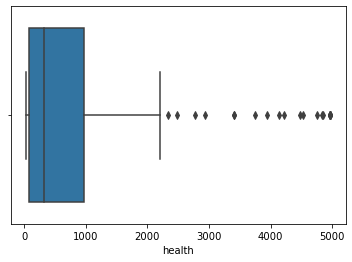

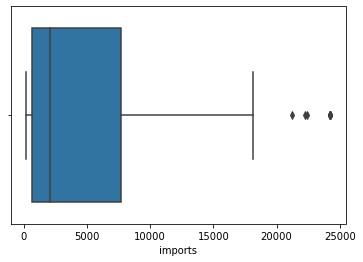

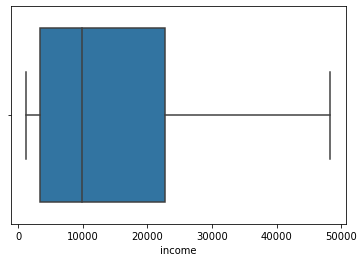

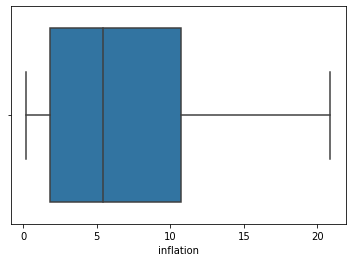

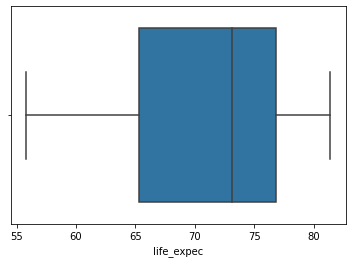

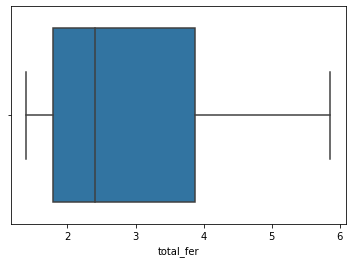

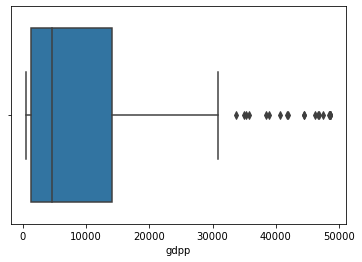

In [12]:
for column in country.describe().columns:
    plot(column,country)

In [13]:
#scalling
scaler = StandardScaler()

country_scaled = scaler.fit_transform(country[cols])
country_scaled.shape

(167, 9)

In [14]:
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns=cols
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


## Modelling

In [15]:
# K-means with some arbitary k
kmeans= KMeans(n_clusters=4,max_iter=1000)
kmeans.fit(country_scaled)

KMeans(max_iter=1000, n_clusters=4)

In [16]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 3, 2, 2, 0, 1, 2, 3, 0, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 0, 0, 2, 2])

## Finding the Optimal Number of clusters

### SSD

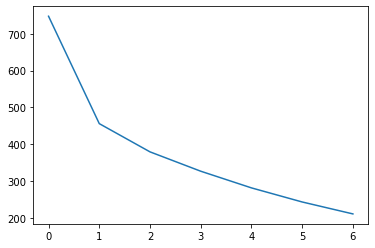

In [17]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=1000)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [18]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,max_iter=1000)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.48447902987180524
For n_clusters=3, the silhouette score is 0.4203919640787207
For n_clusters=4, the silhouette score is 0.3879858729916906
For n_clusters=5, the silhouette score is 0.33822023214822833
For n_clusters=6, the silhouette score is 0.3195064163085193
For n_clusters=7, the silhouette score is 0.3260486617469681
For n_clusters=8, the silhouette score is 0.3441575850851318


In [19]:
# final model after choosing k=4
kmeans = KMeans(n_clusters=4,max_iter=1000)
kmeans.fit(country_scaled)
kmeans.labels_

array([2, 0, 0, 2, 3, 0, 0, 1, 1, 0, 3, 3, 0, 3, 0, 1, 0, 2, 0, 0, 3, 0,
       0, 1, 3, 2, 2, 0, 2, 1, 0, 2, 2, 3, 0, 0, 2, 2, 2, 3, 2, 3, 1, 3,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 1, 2, 2, 0, 1, 2, 3, 0, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 3, 3, 2,
       2, 3, 3, 1, 0, 2, 2, 3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 3, 2, 3, 0, 0, 0, 3, 3, 1, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 1, 3, 3, 0, 0, 3, 3, 0, 0, 2, 0, 1, 1, 0, 2, 3, 2, 2, 0, 0, 3,
       0, 2, 0, 1, 1, 1, 3, 0, 0, 0, 0, 2, 2])

In [20]:
country['cluster_id']= kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,3


In [21]:
country.cluster_id.value_counts()

0    60
2    44
3    36
1    27
Name: cluster_id, dtype: int64

## Plots

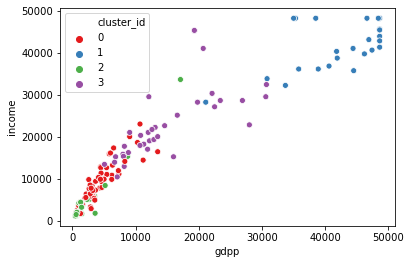

In [22]:
sns.scatterplot(x='gdpp',y='income',hue ='cluster_id',data=country,palette='Set1')

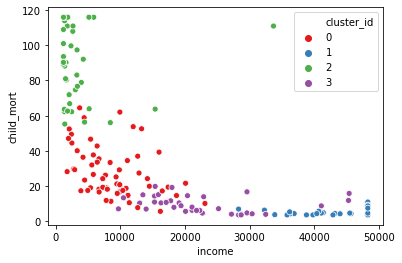

In [23]:
sns.scatterplot(x='income',y='child_mort',hue ='cluster_id',data=country,palette='Set1')

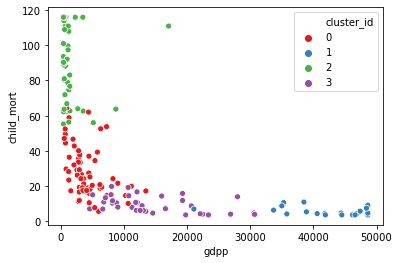

In [24]:
sns.scatterplot(x='gdpp',y='child_mort',hue ='cluster_id',data=country,palette='Set1')

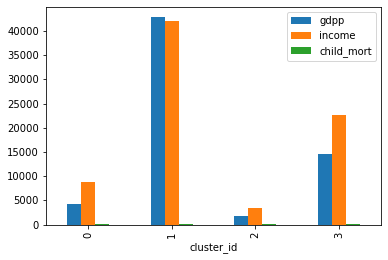

In [25]:
country[['gdpp','income','child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind='bar');

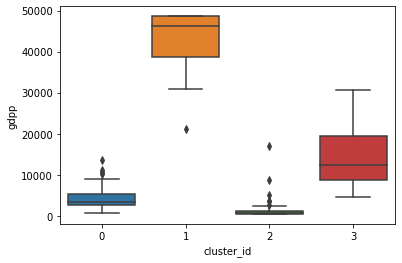

In [26]:
sns.boxplot(x='cluster_id',y='gdpp',data=country)

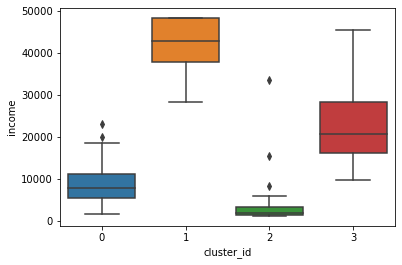

In [27]:
sns.boxplot(x='cluster_id',y='income',data=country)

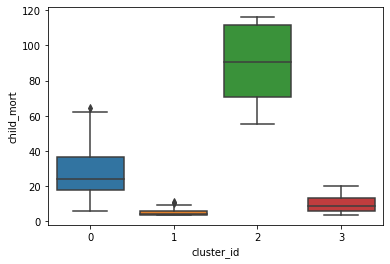

In [28]:
sns.boxplot(x='cluster_id',y='child_mort',data=country)

### We can see after using K-Means Algorithm cluster 2 countries are in direst need of aid from the analysis.

In [29]:
# Finding 5 countries which are in direst need of aid.
c2= country[country['cluster_id']==2]
c2.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
31,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,2
112,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,2
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,55.78,5.560,465.9,2
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.70,5.861,465.9,2


## Hierarchical Clustering 

In [30]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [31]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,3


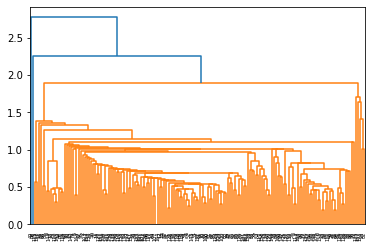

In [32]:
#single linkage
mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

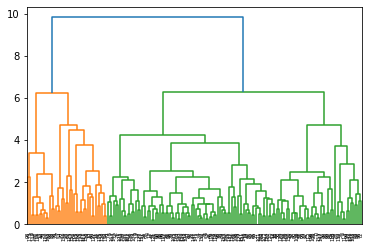

In [33]:
#complete linkage
mergings = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [34]:
#clustering
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 2, 0, 0, 1, 3, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       3, 2, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [35]:
country['cluster_labels'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0,1
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,3,1


In [36]:
country.cluster_labels.value_counts()

1    84
0    43
2    26
3    14
Name: cluster_labels, dtype: int64

## Plots

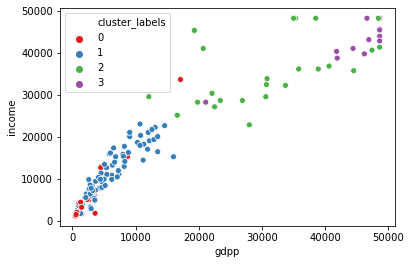

In [37]:
sns.scatterplot(x='gdpp',y='income',hue ='cluster_labels',data=country,palette='Set1')

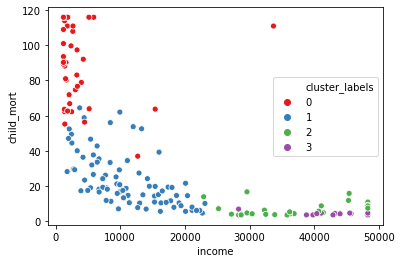

In [38]:
sns.scatterplot(x='income',y='child_mort',hue ='cluster_labels',data=country,palette='Set1')

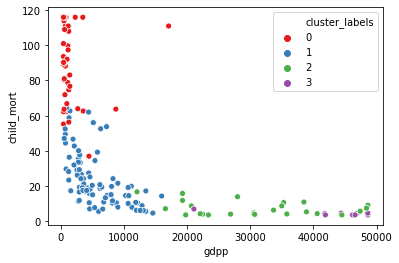

In [39]:
sns.scatterplot(x='gdpp',y='child_mort',hue ='cluster_labels',data=country,palette='Set1')

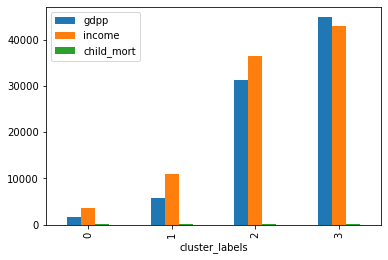

In [44]:
country[['gdpp','income','child_mort','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar');

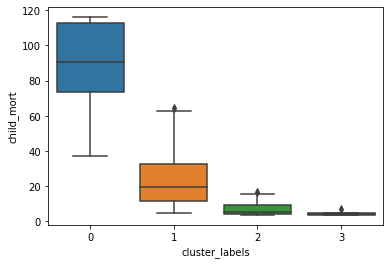

In [40]:
sns.boxplot(x='cluster_labels', y='child_mort', data=country)

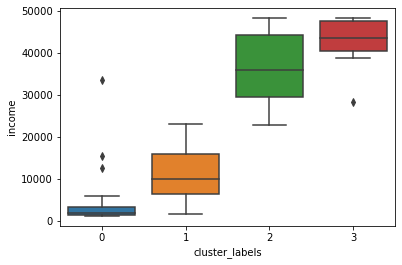

In [41]:
sns.boxplot(x='cluster_labels', y='income', data=country)

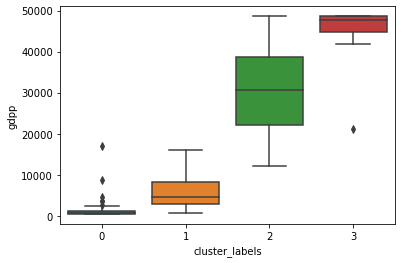

In [42]:
sns.boxplot(x='cluster_labels', y='gdpp', data=country)

###  We can see after using K-Means Algorithm cluster 2 countries are in direst need of aid from the analysis.

In [43]:
# Finding 5 countries which are in direst need of aid.
c0= country[country['cluster_labels']==0]
c0.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
31,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,2,0
112,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,2,0
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,55.78,5.560,465.9,2,0
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.70,5.861,465.9,2,0


## After using K-Means algorithm and Hierarchical Clustering 


### These countries are in direst need of aid. 

1. Central African Republic
2. Congo, Dem. Rep.
3. Niger
4. Mozambique
5. Burundi